In [13]:
import cv2
import math
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [236]:
# image = cv2.cvtColor(cv2.imread('images/images/style.png'), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(cv2.imread('images/images/input.jpg'), cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(cv2.imread('images/images/dog.jpeg'), cv2.COLOR_BGR2RGB)

In [295]:
def funk_im(image):
    fig, ax = pyplot.subplots()
    ax.imshow(image)
    fig.set_figwidth(9)
    fig.set_figheight(9)
    pyplot.show

In [296]:
def funk_plt(plot):
    fig, ax = pyplot.subplots()
    ax.plot(plot)
    fig.set_figwidth(9)
    fig.set_figheight(9)
    pyplot.show

In [297]:
def funk_plt_bgr(plot_1, plot_2, plot_3):
    fig, ax = pyplot.subplots()
    ax.plot(plot_1, color='b')
    ax.plot(plot_2, color='g')
    ax.plot(plot_3, color='r')
    fig.set_figwidth(9)
    fig.set_figheight(9)
    pyplot.show

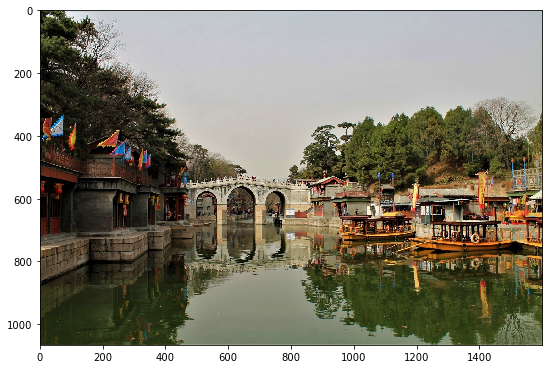

In [298]:
funk_im(image)

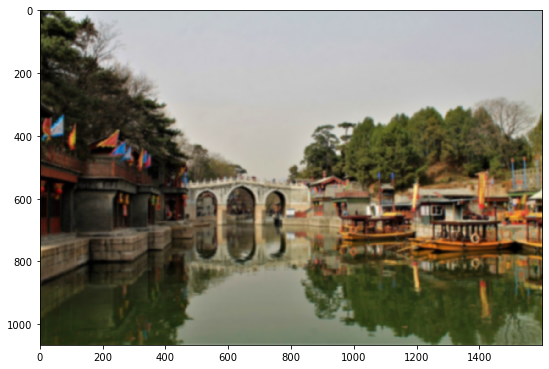

In [299]:
def ftr_blur(par=3):
    return cv2.GaussianBlur(image, (par, par), 0)

funk_im(ftr_blur(17))

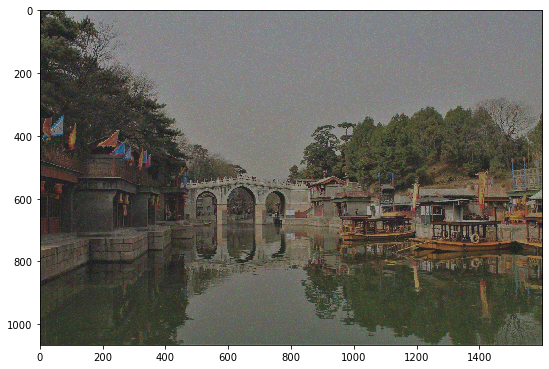

In [300]:
def flt_noise(par=0):
    dst = np.empty_like(image)
    noise = cv2.randn(dst, (0,0,0), (20, 20,20))
    return cv2.addWeighted(image, 0.5, noise, 0.5, 30)

funk_im(flt_noise())

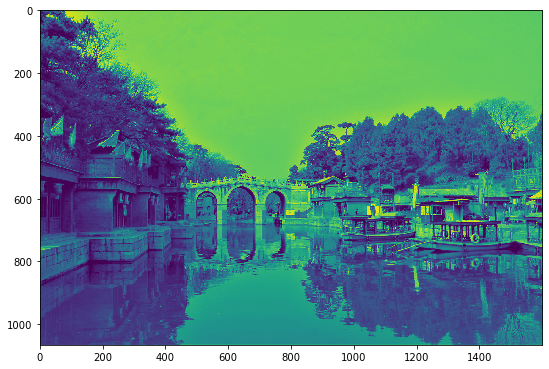

In [325]:
def flt_grayscale(par=0):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image_gray

funk_im(flt_grayscale())

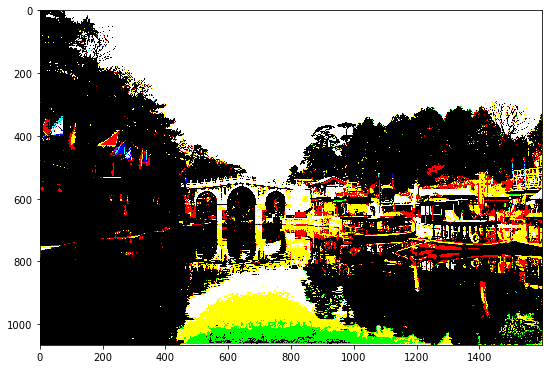

In [302]:
def flt_threshold(par=0):
    return cv2.threshold(image, 127, 255, par)[1]

funk_im(flt_threshold())

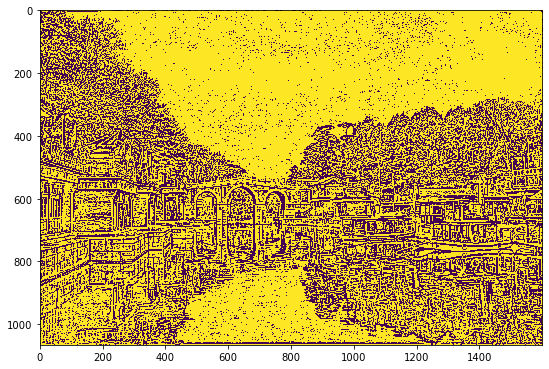

In [324]:
def flt_adaptive_threshold(par=0):
    return cv2.adaptiveThreshold(flt_grayscale(), 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

funk_im(flt_adaptive_threshold())

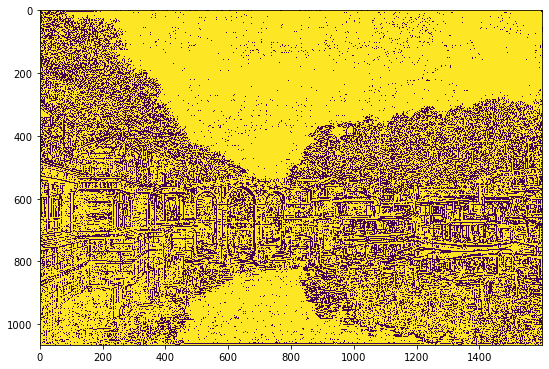

In [304]:
def flt_adaptive_threshold1(par=0):
    return cv2.adaptiveThreshold(flt_grayscale(), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                cv2.THRESH_BINARY, 11, 2)
funk_im(flt_adaptive_threshold1())

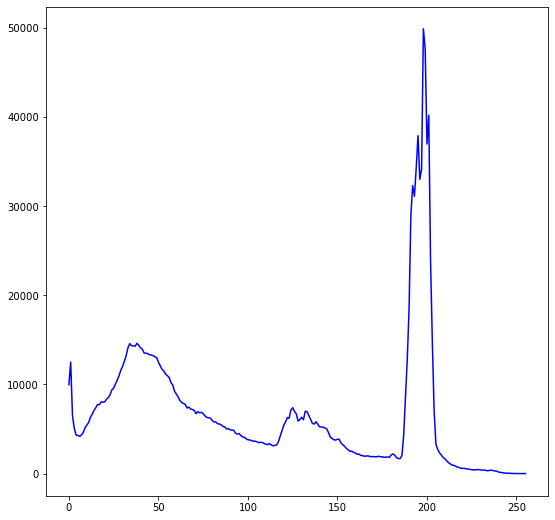

In [280]:
def hist_illumination():
    return cv2.calcHist([flt_grayscale().ravel()], [0], None, [256], [0,256])

funk_plt(hist_illumination())

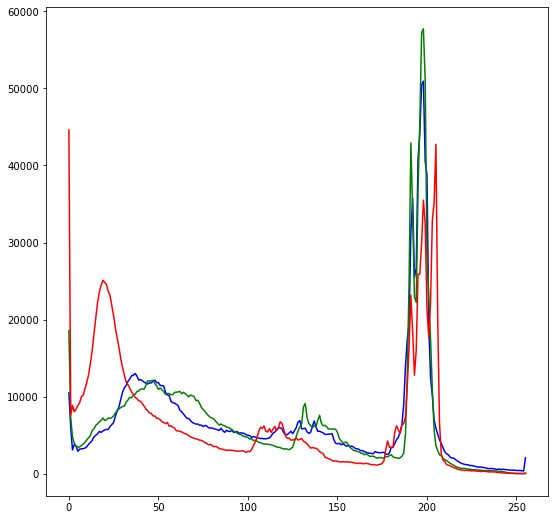

In [285]:
def hist_bgr(par=0):
    bgr = ('b', 'g', 'r')
    return cv2.calcHist([image], [par], None, [256], [0,256])

funk_plt_bgr(hist_bgr(0), hist_bgr(1), hist_bgr(2))